# Analysis of Generated Evaluation Metrics

Looking at trends in the evaluted metric values

**Importing Libraries and Loading Data**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load the DataFrame
df = pd.read_csv('../../data/evaluated.csv')

__Analysing Main (BART) Model__

In [9]:
# Statistical Overview
print(df.describe())

       EMD Source-Predicted  EMD Target-Predicted  Content Preservation Score
count            963.000000            963.000000                  963.000000
mean               0.063682              0.066473                    0.981132
std                0.112228              0.104514                    0.037997
min                0.000000              0.000000                    0.648695
25%                0.000000              0.000000                    0.981079
50%                0.003739              0.012150                    0.995505
75%                0.071262              0.089106                    1.000000
max                0.491058              0.482766                    1.000000


In [10]:
# Correlation Analysis
print(df.corr())

                            EMD Source-Predicted  EMD Target-Predicted  \
EMD Source-Predicted                    1.000000             -0.031704   
EMD Target-Predicted                   -0.031704              1.000000   
Content Preservation Score             -0.139008              0.113961   

                            Content Preservation Score  
EMD Source-Predicted                         -0.139008  
EMD Target-Predicted                          0.113961  
Content Preservation Score                    1.000000  


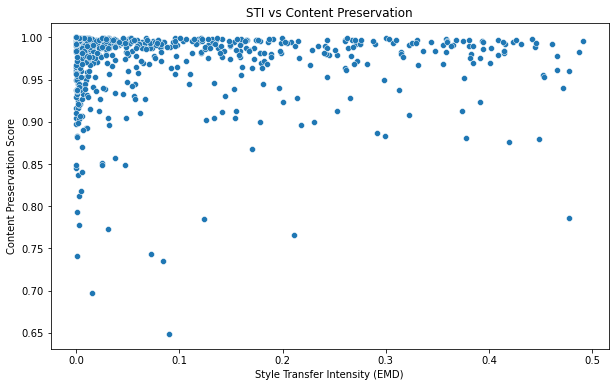

In [11]:
# Scatter Plot for STI vs Content Preservation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='EMD Source-Predicted', y='Content Preservation Score', data=df)
plt.title('STI vs Content Preservation')
plt.xlabel('Style Transfer Intensity (EMD)')
plt.ylabel('Content Preservation Score')
plt.show()

## Observations

### **Descriptive Analysis**

**EMD Source-Predicted & EMD Target-Predicted:**

Both have similar mean values (~0.063 and ~0.066), suggesting that on average, the style transfer shifts the style somewhat away from the source and towards the target, but not drastically.
The standard deviations are also similar and relatively high compared to the means, indicating a wide range of style transfer effectiveness across different texts.
The maximum values (0.491 and 0.482) show that in some cases, the style shift is quite significant.

**Content Preservation Score:**

The mean is very high (~ 0.981), indicating excellent content preservation across the dataset.
The standard deviation is small (~0.038), suggesting that most texts have consistently high content preservation.
The minimum value (0.648) indicates that in the worst cases, the content preservation is still reasonable.

### **Correlation Analysis**

EMD Source-Predicted and Content Preservation Score: The negative correlation (-0.139) suggests a mild inverse relationship: as the style shifts away from the source, content preservation slightly decreases. However, the correlation is weak.

EMD Target-Predicted and Content Preservation Score: The positive correlation (0.113) is also mild and suggests that as the style becomes more like the target, content preservation slightly improves. Again, the relationship is not strong.

EMD Source-Predicted and EMD Target-Predicted: The correlation is very low (-0.031), indicating almost no direct relationship between the distance from the source style and the closeness to the target style.

### **STI vs CPS Plot**

**1. Higher density at top left corner**

High Content Preservation, Low STI: This suggests that for most of the data, the model is good at preserving the content of the original text, but the intensity of style transfer is low. In simpler terms, the style isn't changing much, but the original meaning is well maintained. This could indicate that the model is being conservative in applying style changes. It’s doing well at not distorting the original content but is not making significant alterations in style.

**2. General trend is points gathered at the top**

High Content Preservation, Varying STI: These are cases where the content is still well preserved, but there is more variation in the intensity of style change. These points might represent the ideal balance for our task, where the style is noticeably altered while still keeping the content intact.

**3. Scattered points around**

Mixed Performance: The few points scattered across different areas of the graph suggest a mixed performance. Depending on their exact placement, these could indicate instances where either content preservation or style intensity (or both) varies significantly. Such variations could be due to the complexity or nature of the specific texts, indicating that the model’s performance is not consistent across all types of input.

Analysisng the EMD visually

In [5]:
df.head()

,Source Text,Target Text,Predicted Text,EMD Source-Predicted,EMD Target-Predicted,Content Preservation Score
0,"in april 2009 a brazilian human rights group, ...","in april 2009 a brazilian human rights group, ...","in april 2009 a brazilian human rights group, ...",0.000000,0.097619,1.000000
1,the 51 day standoff and ensuing murder of 76 m...,the 51 day standoff and ensuing deaths of 76 m...,the 51 day standoff and ensuing murder of 76 m...,0.000000,0.148595,1.000000
2,"mark oaten (born 8 march 1964, watford) is a d...","mark oaten (born 8 march 1964, watford) is a l...","mark oaten (born 8 march 1964, watford) is a l...",0.037568,0.000000,0.934390
3,another infamous period of colonisation in anc...,another period of colonisation in ancient time...,another period of colonisation in ancient time...,0.025609,0.000000,0.851425
4,photo sequence of astonishing 2005 chicagoland...,photo sequence of 2005 chicagoland crash with ...,photo sequence of 2005 chicagoland crash with ...,0.001016,0.000000,0.983531
